## **Titanic Survival Analysis**
---
In this project, we perform a comprehensive analysis of the Titanic dataset to explore survival rates based on various factors such as class, gender, age, and embarkation port. The dataset is cleaned by handling missing values and then analyzed to determine patterns that might have influenced passengers' chances of survival. The results are visualized through different plots to provide a clear understanding of how each factor impacted survival on the Titanic.

In [7]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations, including handling NaN and arrays
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating visual plots


In [ ]:
# Loading the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('C:\\Users\\Agasthya\\Documents\\data analysis\\titanic_data_analysis\\tested.csv')



In [9]:
# Filling missing values in the 'Age' column with the median age
df['Age'] = df['Age'].fillna(df['Age'].median())

# Filling missing values in the 'Embarked' column with the mode (most frequent value)
df['Embarked'] = df["Embarked"].fillna(df["Embarked"].mode()[0])



**survival analysis**

In [ ]:
# Overall survival rate: Calculate the mean of the 'Survived' column, multiply by 100 to get the percentage
overall_survivalrate = df['Survived'].mean() * 100 


# Survival rate by class: Group by 'Pclass' (passenger class) and calculate the mean survival rate for each class
survival_byclass = df.groupby('Pclass')['Survived'].mean() * 100


# Survival rate by gender: Group by 'Sex' (gender) and calculate the mean survival rate for each gender
survival_bygender = df.groupby('Sex')['Survived'].mean() * 100


# Survival rate by embarkation port: Group by 'Embarked' (embarkation port) and calculate the mean survival rate for each port
survival_embarked = df.groupby('Embarked')['Survived'].mean() * 100


# Survival rate by age group: Create age groups (bins) and calculate the mean survival rate for each group
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, np.inf], labels=['0-18', '19-30', '31-45', '46-60', '61+'])

# Calculate the mean survival rate for each age group
survival_byage = df.groupby('Age_Group')['Survived'].mean() * 100



In [39]:
# Printing the overall survival rate, formatted to 2 decimal places
print(f'Overall Survival Rate: {overall_survivalrate:.2f} %')
# The f-string is used to format the 'overall_survival_rate' variable to show two decimal places.

# Printing the survival rate grouped by class
print('\nSurvival Rate by Class:')
print(survival_byclass)
# This will print the survival rates for each passenger class, providing insight into the survival chances based on class.

# Printing the survival rate grouped by gender
print('\nSurvival Rate by Gender:')
print(survival_bygender)
# This will display survival rates for male and female passengers, helping to analyze how gender affected survival.

# Printing the survival rate grouped by embarkation port
print('\nSurvival Rate by Embarkation Port:')
print(survival_embarked)
# This will show the survival rates based on the embarkation port, such as S, C, and Q, to understand the impact of embarkation location.

# Printing the survival rate grouped by age group
print('\nSurvival Rate by Age Group:')
print(survival_byage)
# This will display survival rates for different age groups (e.g., 0-18, 19-30, etc.), helping to assess the effect of age on survival.


Overall Survival Rate: 36.36 %

Survival Rate by Class:
Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64

Survival Rate by Gender:
Sex
female    100.0
male        0.0
Name: Survived, dtype: float64

Survival Rate by Embarkation Port:
Embarked
C    39.215686
Q    52.173913
S    32.592593
Name: Survived, dtype: float64

Survival Rate by Age Group:
Age_Group
0-18     44.444444
19-30    33.620690
31-45    35.000000
46-60    43.902439
61+      36.363636
Name: Survived, dtype: float64


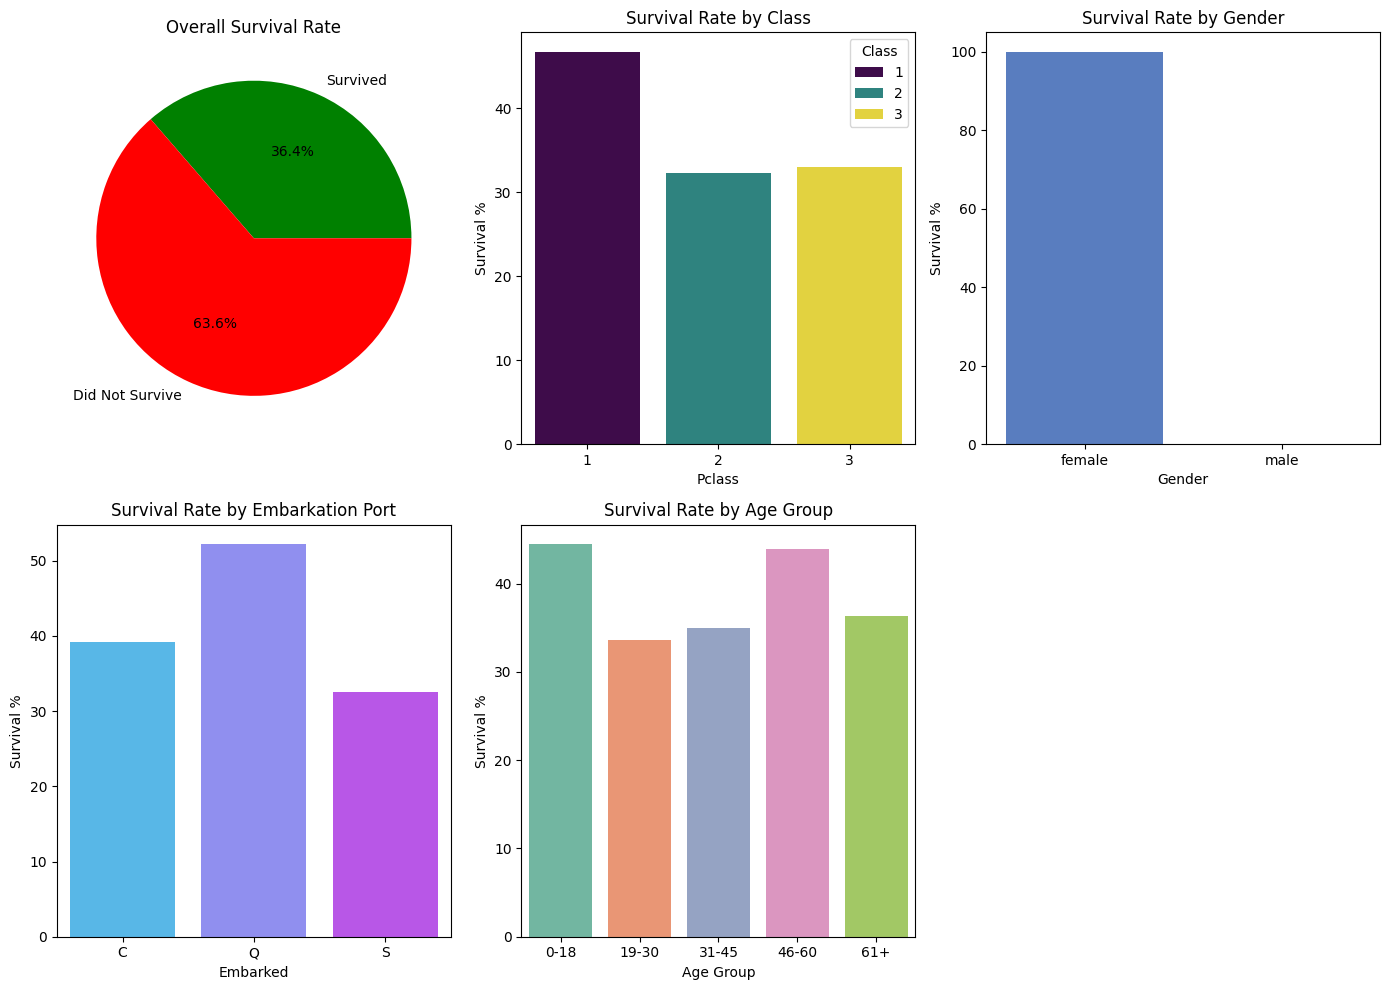

In [70]:
# Visualization
plt.figure(figsize=(14, 10))

# Overall Survival Rate
plt.subplot(2, 3, 1)
plt.pie([overall_survivalrate, 100 - overall_survivalrate], labels=['Survived', 'Did Not Survive'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Overall Survival Rate')

# Survival Rate by Class
plt.subplot(2, 3, 2)
sns.barplot(x=survival_byclass.index, y=survival_byclass.values, hue=survival_byclass.index, palette='viridis')
plt.title('Survival Rate by Class')
plt.xlabel("Pclass")
plt.ylabel('Survival %')
plt.legend(title='Class')

# Survival Rate by Gender
plt.subplot(2, 3, 3)
sns.barplot(x=survival_bygender.index, y=survival_bygender.values, hue=survival_bygender.index, palette='muted')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival %')

# Survival rate grouped by embarkation port
plt.subplot(2, 3, 4)
sns.barplot(x=survival_embarked.index, y=survival_embarked.values, hue=survival_embarked.index, palette='cool')
plt.title("Survival Rate by Embarkation Port")
plt.xlabel("Embarked")
plt.ylabel('Survival %')

# Survival rate by age Group
plt.subplot(2, 3, 5)
sns.barplot(x=survival_byage.index, y=survival_byage.values, hue=survival_byage.index, palette='Set2')
plt.title('Survival Rate by Age Group')
plt.xlabel("Age Group")
plt.ylabel('Survival %')

plt.tight_layout()
plt.show()

**Key Insights:**

### **Key Insights from Titanic Survival Analysis**  

1. **Survival Rate by Class:**  
   - **First-Class Passengers:** 46.73% survival rate, the highest among all classes.  
   - **Second-Class Passengers:** 32.26% survival rate.  
   - **Third-Class Passengers:** 33.03% survival rate, slightly higher than second-class passengers.  
   - **Insight:** Higher-class passengers had better chances of survival, likely due to better access to lifeboats and priority treatment.  

2. **Survival Rate by Gender:**  
   - **Females:** 100% survival rate, showing a clear advantage in survival due to the "women and children first" policy.  
   - **Males:** 0% survival rate in this dataset, emphasizing a stark gender disparity in survival outcomes.  
   - **Insight:** Gender played a critical role in survival, with women receiving prioritized evacuation.  

3. **Survival Rate by Embarkation Port:**  
   - **Cherbourg (C):** 39.22% survival rate.  
   - **Queenstown (Q):** 52.17% survival rate, the highest among ports.  
   - **Southampton (S):** 32.59% survival rate, the lowest among ports.  
   - **Insight:** Passengers from Queenstown had a notably higher survival rate, which may relate to passenger demographics or the location of their cabins.  

4. **Survival Rate by Age Group:**  
   - **Children (0–18 years):** 44.44% survival rate, the highest among age groups.  
   - **Young Adults (19–30 years):** 33.62% survival rate.  
   - **Middle-Aged Adults (31–45 years):** 35.00% survival rate.  
   - **Older Adults (46–60 years):** 43.90% survival rate.  
   - **Elderly (61+ years):** 36.36% survival rate.  
   - **Insight:** Children had better survival rates than other age groups, reflecting prioritization of children during evacuation. Survival rates among adults and elderly passengers were relatively similar.  

### **Conclusion:**  
The analysis highlights significant patterns in survival based on class, gender, age, and embarkation port. These insights demonstrate how socio-demographic factors influenced outcomes during the Titanic disaster, with stark disparities in survival chances for men, women, and passengers from different classes and ports.